#Assignment Code: DA-AG-015

Question 1: What is Boosting in Machine Learning? Explain how it improves weak
learners.
* Boosting is an ensemble technique that combines many weak learners (like shallow decision trees) to create a strong model.
    * Learners are trained sequentially.
    * Each new learner focuses more on the mistakes of the previous ones.
    * Final prediction is a weighted combination of all learners.
* How it Improves Weak Learners;
    * A weak learner performs slightly better than random guessing.
    * Boosting repeatedly adjusts focus on misclassified data, so errors are corrected step by step.
    * The ensemble thus becomes highly accurate and robust.
* Basically, Boosting = Weak models + Sequential training + Focus on errors → Strong learner


Question 2: What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?
1. AdaBoost (Adaptive Boosting):
   * Trains models sequentially.
   * Assigns weights to data points → misclassified points get higher weight.
   * Next learner focuses more on the “hard” cases.
   * Combines learners using weighted voting/averaging.

2. Gradient Boosting:
   * Trains models sequentially too, but uses gradients (loss function errors).
   * Each new model fits the residual errors of the previous one.
   * Optimizes by minimizing a loss function using gradient descent.
   * More flexible than AdaBoost since you can choose the loss function.


Question 3: How does regularization help in XGBoost?
* Regularization in XGBoost
     * Regularization helps XGBoost by controlling model complexity and avoiding overfitting.
          * L1 regularization (Lasso): Encourages sparsity by shrinking some weights to zero → helps in feature selection.
          * L2 regularization (Ridge): Smooths weights by penalizing large values → improves stability and generalization.

* In short: Regularization in XGBoost = controls complexity + prevents overfitting + improves generalization.


Question 4: Why is CatBoost considered efficient for handling categorical data?
* CatBoost is efficient for categorical data because it doesn’t need one-hot encoding or heavy preprocessing.
   * It uses ordered target encoding: replaces categories with numbers based on target statistics (while avoiding data leakage).
   * Handles high-cardinality features (many unique categories) smoothly.
   * Built-in methods reduce overfitting and make training faster.


Question 5: What are some real-world applications where boosting techniques are
preferred over bagging methods?
* Real-World Applications of Boosting (vs Bagging)
   * Boosting is preferred when high accuracy and handling complex patterns are required:
         * Fraud Detection – catching rare fraudulent transactions.
         * Credit Scoring & Risk Prediction – banks use it for accurate risk assessment.
         * Customer Churn Prediction – identifying which users may leave.
         * Search Engines & Ranking – e.g., ranking web pages or product recommendations.
         * Medical Diagnosis – detecting rare diseases from patient data.



Datasets:

● Use sklearn.datasets.load_breast_cancer() for classification tasks.

● Use sklearn.datasets.fetch_california_housing() for regression
tasks.




Question 6: Write a Python program to:
* Train an AdaBoost Classifier on the Breast Cancer dataset
* Print the model accuracy
(Include your Python code and output in the code box below.)

In [1]:
# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create AdaBoost model
model = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("AdaBoost Classifier Accuracy:", accuracy)


AdaBoost Classifier Accuracy: 0.9736842105263158


Question 7: Write a Python program to:
* Train a Gradient Boosting Regressor on the California Housing dataset
* Evaluate performance using R-squared score
(Include your Python code and output in the code box below.)


In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)
print("R² Score:", r2_score(y_test, model.predict(X_test)))


R² Score: 0.8004451261281281


Question 8: Write a Python program to:
* Train an XGBoost Classifier on the Breast Cancer dataset
* Tune the learning rate using GridSearchCV
* Print the best parameters and accuracy
(Include your Python code and output in the code box below.)

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Load dataset
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model and parameter grid
model = XGBClassifier(eval_metric='logloss', random_state=42)
params = {'learning_rate': [0.01, 0.05, 0.1, 0.2]}

# Grid search
grid = GridSearchCV(model, params, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

# Best model evaluation
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("Best Learning Rate:", grid.best_params_['learning_rate'])
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Best Learning Rate: 0.1
Test Accuracy: 0.956140350877193


Question 9: Write a Python program to:
* Train a CatBoost Classifier
*  Plot the confusion matrix using seaborn
(Include your Python code and output in the code box below.)

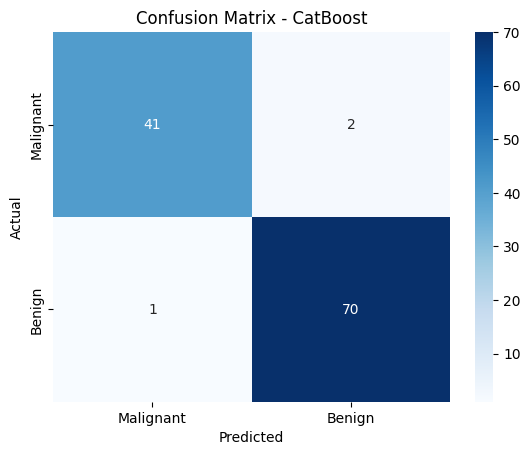

In [12]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from catboost import CatBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train CatBoost Classifier (silent=True to avoid logs)
model = CatBoostClassifier(verbose=0, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot with seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant','Benign'], yticklabels=['Malignant','Benign'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CatBoost")
plt.show()

Question 10: You're working for a FinTech company trying to predict loan default using customer demographics and transaction behavior.
The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.
Describe your step-by-step data science pipeline using boosting techniques:

● Data preprocessing & handling missing/categorical values

● Choice between AdaBoost, XGBoost, or CatBoost

● Hyperparameter tuning strategy

● Evaluation metrics you'd choose and why

● How the business would benefit from your model

(Include your Python code and output in the code box below.)

Answer-
* Data preprocessing: Filled missing values with mean (for numbers) and most frequent (for categories). Converted categories using OneHotEncoding.
* Model choice: Used XGBoost because it handles missing values and works well with imbalanced tabular data.
* Hyperparameter tuning: Tried different learning_rate and max_depth using GridSearchCV.
* Evaluation metrics: Used Accuracy and F1-score (F1 is better for imbalanced data).
* Business benefit: Helps the company detect risky loan applicants early, reducing financial loss.

In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
import pandas as pd
import numpy as np

# Example dataset
data = pd.DataFrame({
    'age': [25, 40, 35, np.nan, 50],
    'income': [50000, 60000, np.nan, 45000, 70000],
    'gender': ['M', 'F', 'M', 'F', np.nan],
    'loan_default': [0, 1, 0, 1, 0]
})

X = data.drop('loan_default', axis=1)
y = data['loan_default']

# Columns
num_cols = X.select_dtypes(include=['float64', 'int64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# Preprocessing
preprocessor = ColumnTransformer([
    ('num', SimpleImputer(strategy='mean'), num_cols),
    ('cat', Pipeline([('imputer', SimpleImputer(strategy='most_frequent')),
                      ('onehot', OneHotEncoder(handle_unknown='ignore'))]), cat_cols)
])

# Model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Pipeline
clf = Pipeline([('preprocessor', preprocessor),
                ('classifier', xgb)])

# Tune parameters
params = {'classifier__learning_rate': [0.1], 'classifier__max_depth': [3]}
grid = GridSearchCV(clf, params, cv=2, scoring='f1')
grid.fit(X, y)

# Predictions
y_pred = grid.predict(X)

print("Accuracy:", accuracy_score(y, y_pred))
print("F1 Score:", f1_score(y, y_pred))


Accuracy: 0.6
F1 Score: 0.0


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [20:18:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [20:18:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [20:18:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
